<h4>HOUSE PRICE PREDICTION</h4>

In [1]:
#Importing the necessary libraries-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm

In [3]:
import warnings
warnings.simplefilter(action='ignore')

In [4]:
#loading the datase--
#We have taken this house price data grom Kaggle

df_train=pd.read_csv('train.csv',index_col=0)
df_test=pd.read_csv('test.csv',index_col=0)
print('Dimension of Train Data:',df_train.shape)
print('Dimension of Test Data:',df_test.shape)


Dimension of Train Data: (1460, 80)
Dimension of Test Data: (1459, 79)


In [5]:
#We will do the rest of our works based on combined Dataset
df=pd.concat([df_train,df_test])

In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [9]:
df.drop(['SalePrice'],axis=1,inplace=True)

In [10]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
#Missing Values--

total =df.isnull().sum().sort_values(ascending=False)
ratio=(df.isnull().sum() / len(df)).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Values':total,'Ratio':ratio})
missing_data.head(30)

,Missing Values,Ratio
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


<Axes: ylabel='Id'>

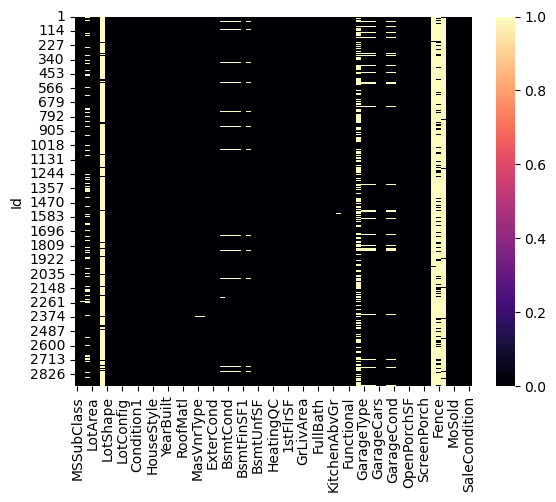

In [12]:
sns.heatmap(df.isnull(),cmap='magma')

In [13]:
#Handling Missing Data-
# we will fill the NULL value with none and 0

#filling the missing values in the Column Typesof PoolQC
df['PoolQC'].fillna('None', inplace = True)

#filling the missing values in the Column Types of MiscFeature
df['MiscFeature'].fillna('None', inplace = True)

#filling the missing values in the Column Types of Alley
df['Alley'].fillna('None', inplace = True)

#filling the missing values in the Column Types of BsmtFinSF2
df['BsmtFinSF2'].fillna(0, inplace = True)

#filling the missing values in the Column Types of BsmtFinSF1
df['BsmtFinSF1'].fillna(0, inplace = True)

#filling the missing values in the Column Types of BsmtFinType2
df['BsmtFinType2'].fillna('None', inplace = True)

#filling the missing values in the Column Types of BsmtFinType1
df['BsmtFinType1'].fillna('None', inplace = True)

#filling the missing values in the Column Types of BsmtFullBath
df['BsmtFullBath'].fillna(0, inplace = True)

#filling the missing values in the Column Types of BsmtHalfBath
df['BsmtHalfBath'].fillna(0, inplace = True)

#filling the missing values in the Column Types of BsmtQual
df['BsmtQual'].fillna('None', inplace = True)

#filling the missing values in the Column Types of BsmtUnfSF
df['BsmtUnfSF'].fillna(0, inplace = True)

#filling the missing values in the Column Types of Electrical
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)

#filling the missing values in the Column Types of Exterior2nd
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)

#filling the missing values in the Column Types of Exterior2nd
df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0], inplace = True)

#filling the missing values in the Column Types of Fence
df['Fence'].fillna('None', inplace = True)

#filling the missing values in the Column Types of FireplaceQu
df['FireplaceQu'].fillna('None', inplace = True)

#filling the missing values in the Column Types of MSZoning
df['MSZoning'].fillna('None', inplace = True)

#filling the missing values in the Column Types of MasVnrArea
df['MasVnrArea'].fillna(0, inplace = True)

#filling the missing values in the Column Types of MasVnrType
df['MasVnrType'].fillna('None', inplace = True)

#filling the missing values in the Column SaleType
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace = True)

#filling the missing values in the Column TotalBsmtSF
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace = True)

#filling the missing values in the LotFrontage column
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#filling the missing values in the BsmtCond column
df['BsmtCond'].fillna('None', inplace = True)

#filling the missing values in the BsmtCond column
df['BsmtExposure'].replace(('No'), ('None'), inplace = True)
df['BsmtExposure'].fillna('None', inplace = True)

#filling the missing values in the KitchenQual column
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace = True)

#filling the missing values in the GarageYrBlt column
df['GarageYrBlt'].fillna('None', inplace = True)

#filling the missing values in the GarageType column
df['GarageType'].fillna('None', inplace = True)

#filling the missing values in the GarageQual column
df['GarageQual'].fillna('None', inplace = True)

#filling the missing values in the GarageFinish column  
df['GarageFinish'].fillna('None', inplace = True)

#filling the missing values in the GarageCond column
df['GarageCond'].fillna('None', inplace = True)

#filling the missing values in the GarageCars column
df['GarageCars'].fillna(0, inplace = True)

#filling the missing values in the GarageArea column
df['GarageArea'].fillna(0, inplace = True)

#filling the missing values in the Functional column
df['Functional'].fillna(df['Functional'].mode()[0], inplace = True)

In [14]:
df['Utilities'].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [15]:
# AS, we just saw that almost all the rows have same value for Utilities we will get rid of this column
df.drop(['Utilities'], axis = 1, inplace = True)

In [16]:
#Checking if there are any Missing Values are left--
df.isnull().sum().sum()

0

In [17]:
#MSSubClass` feature is read as an `int` type, but is actually a categorical.
df['MSSubClass']=df['MSSubClass'].astype(str)
df['OverallQual ']=df['OverallQual'].astype(str)
df['OverallCond ']=df['OverallCond'].astype(str)
df['YrSold']=df['YrSold'].astype(str)
df['MoSold']=df['MoSold'].astype(str)

In [18]:
df['total_area']=df['1stFlrSF']+df['2ndFlrSF']+df['TotalBsmtSF']
df.drop(['1stFlrSF','2ndFlrSF','TotalBsmtSF'],axis=1,inplace=True)

In [19]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,OverallQual,OverallCond,total_area
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,None,None,0,2,2008,WD,Normal,7,5,2566.0
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,None,None,0,5,2007,WD,Normal,6,8,2524.0
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,None,None,0,9,2008,WD,Normal,7,5,2706.0
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,None,None,0,2,2006,WD,Abnorml,7,5,2473.0
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,None,None,0,12,2008,WD,Normal,8,5,3343.0


Here our Response Variable is Saling Price.

In [20]:
sns.set_style('whitegrid')

<Axes: xlabel='SalePrice', ylabel='Count'>

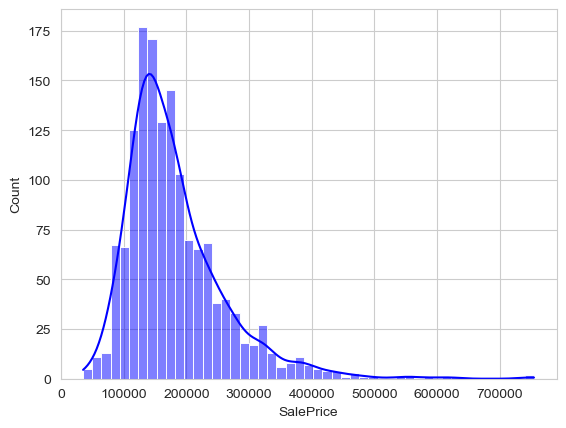

In [21]:
#Histogram of Saling Price--
sns.histplot(df_train['SalePrice'],kde=True,color='blue')

#From Histogram we have found that the Response Variable is Positively Skewed.

Relationship with Numerical Variables.

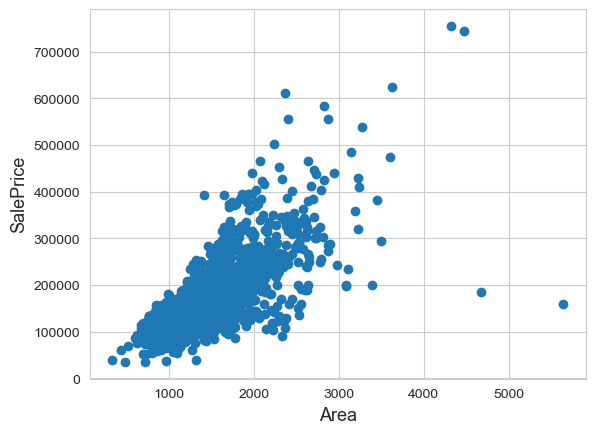

In [22]:
#Scatterplot of GrliveArea and Sale Price
fig, ax = plt.subplots()
ax.scatter(x =df_train['GrLivArea'], y=df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()

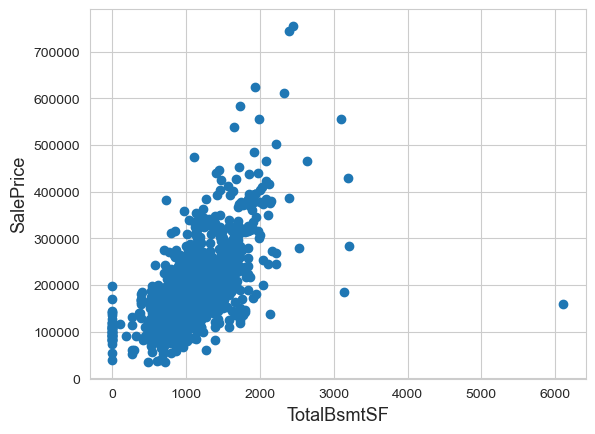

In [23]:
fig, ax = plt.subplots()
ax.scatter(x =df_train['TotalBsmtSF'], y=df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

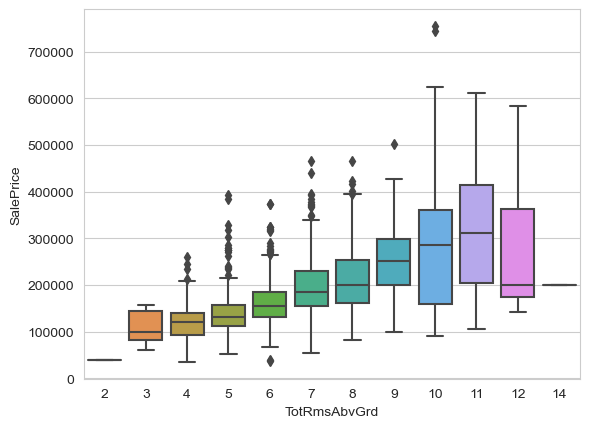

In [24]:
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=df_train)

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

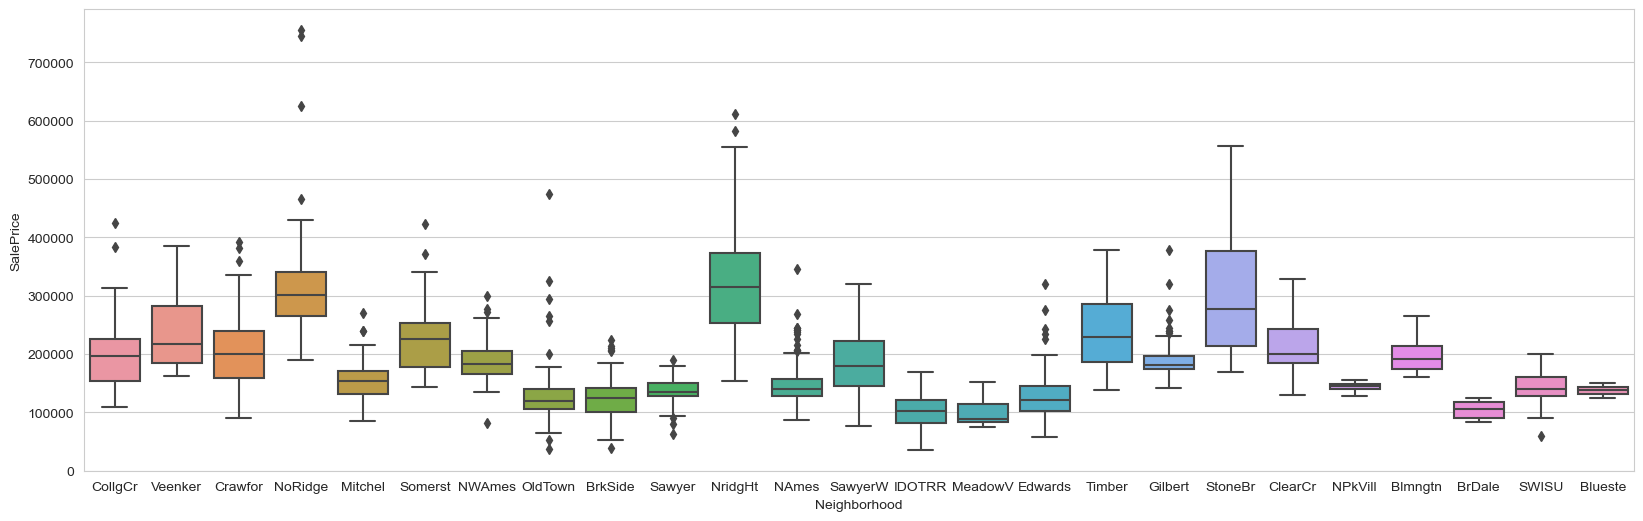

In [25]:
fig=plt.figure(figsize=(20,6))
sns.boxplot(x='Neighborhood',y='SalePrice',data=df_train)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

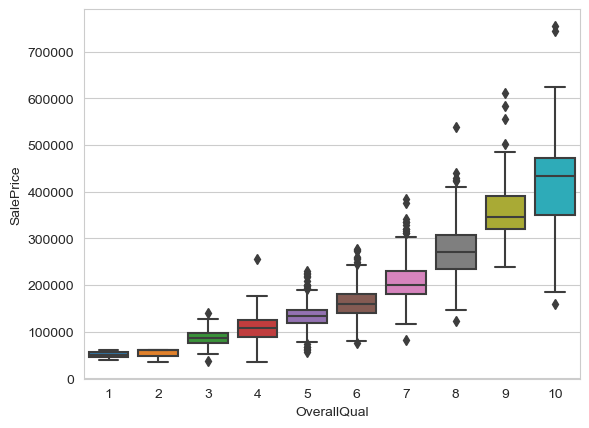

In [26]:
sns.boxplot(x='OverallQual',y='SalePrice',data=df_train)

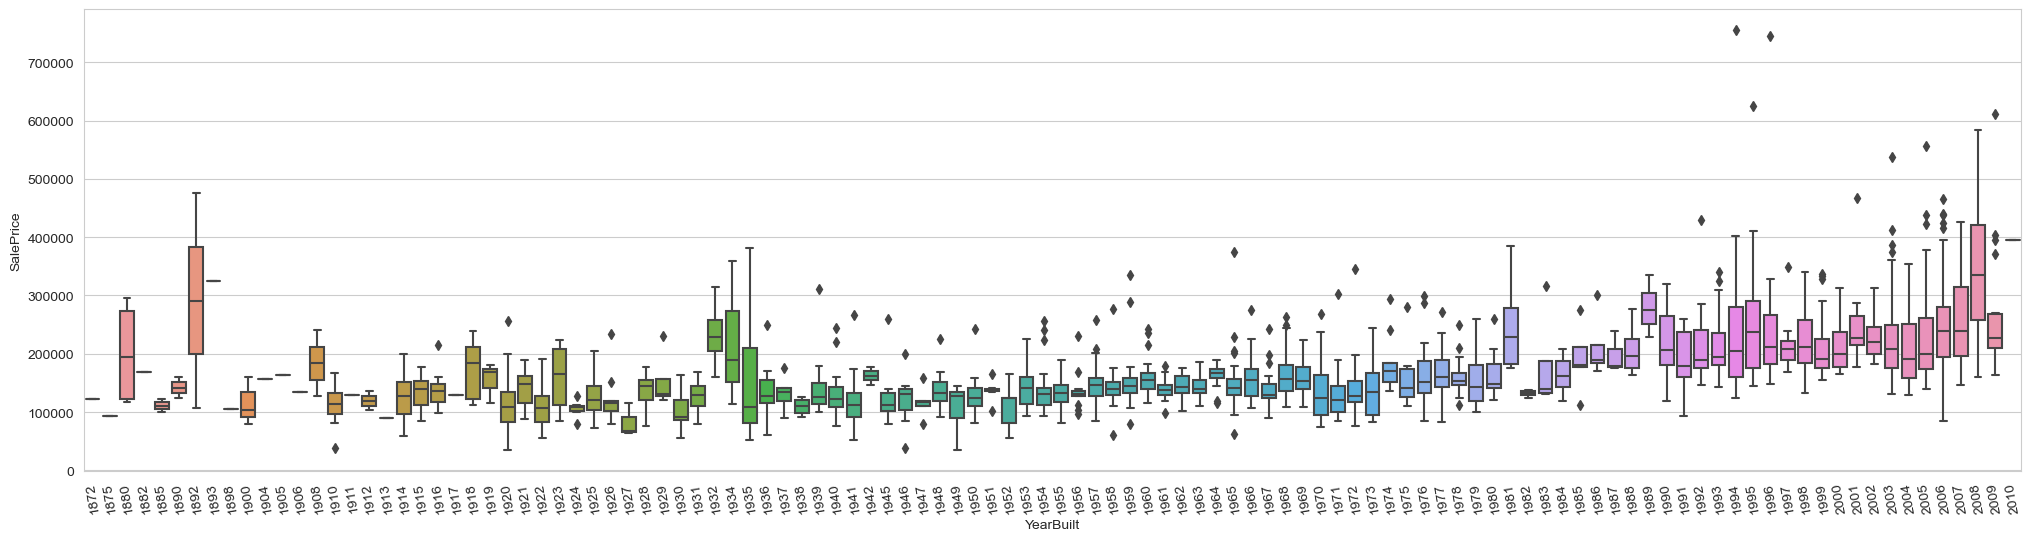

In [27]:
fig=plt.figure(figsize=(25,6))
sns.boxplot(x='YearBuilt',y='SalePrice',data=df_train)
plt.xticks(rotation=100);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [29]:
#fig=plt.figure(figsize=(20, 9))
#sns.heatmap(df_train.corr(),square=True,cmap='coolwarm');

In [30]:
df.corr().style.background_gradient(cmap='coolwarm')

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,total_area
LotFrontage,1.000000,0.387612,0.210123,-0.059130,0.123801,0.087066,0.219629,0.215706,0.056049,0.100304,0.002888,0.363344,0.113748,-0.011778,0.169697,0.043388,0.220571,0.002902,0.328974,0.246510,0.301914,0.353053,0.119778,0.157999,0.006767,0.029015,0.073681,0.155863,0.038065,0.417687
LotArea,0.387612,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194168,0.084107,0.021590,0.000554,0.284519,0.126671,0.025838,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,0.180379,0.213180,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.318097
OverallQual,0.210123,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.282150,-0.042605,0.275643,-0.048393,0.575126,0.165060,-0.040519,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.600743,0.565179,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.665243
OverallCond,-0.059130,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.133118,-0.050823,0.041359,-0.138687,0.009048,-0.116569,-0.042823,0.083911,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.181926,-0.154312,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.169110
YearBuilt,0.123801,0.024128,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279780,-0.027507,0.130786,-0.144191,0.242666,0.211849,-0.030171,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.538611,0.481328,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.384653
YearRemodAdd,0.087066,0.021612,0.571532,0.047654,0.612235,1.000000,0.191668,0.152576,-0.061959,0.165770,-0.060371,0.316972,0.135150,-0.046167,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.425033,0.375892,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.366034
MasVnrArea,0.219629,0.124728,0.426528,-0.133118,0.307520,0.191668,1.000000,0.301537,-0.014580,0.088173,-0.057380,0.400088,0.141141,0.016204,0.254085,0.187685,0.078213,-0.051118,0.277103,0.273129,0.357845,0.371071,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,0.470533
BsmtFinSF1,0.215706,0.194168,0.282150,-0.050823,0.279780,0.152576,0.301537,1.000000,-0.054938,-0.476771,-0.065984,0.211980,0.639038,0.078500,0.081838,-0.007058,-0.113161,-0.086271,0.052629,0.293305,0.255307,0.310219,0.223681,0.124366,-0.099575,0.050934,0.096901,0.084470,0.093310,0.430904
BsmtFinSF2,0.056049,0.084107,-0.042605,0.041359,-0.027507,-0.061959,-0.014580,-0.054938,1.000000,-0.238043,-0.004913,-0.017747,0.162957,0.099530,-0.075314,-0.032368,-0.031111,-0.037758,-0.048245,0.065707,-0.014476,0.003446,0.098462,-0.005805,0.032775,-0.023268,0.063329,0.044530,-0.005130,0.038091
BsmtUnfSF,0.100304,0.021590,0.275643,-0.138687,0.130786,0.165770,0.088173,-0.476771,-0.238043,1.000000,0.046944,0.234388,-0.397648,-0.106840,0.273530,-0.035459,0.183631,0.065059,0.248015,0.005216,0.180733,0.165014,-0.038964,0.120027,0.005162,-0.005764,-0.049019,-0.032236,-0.010450,0.370454


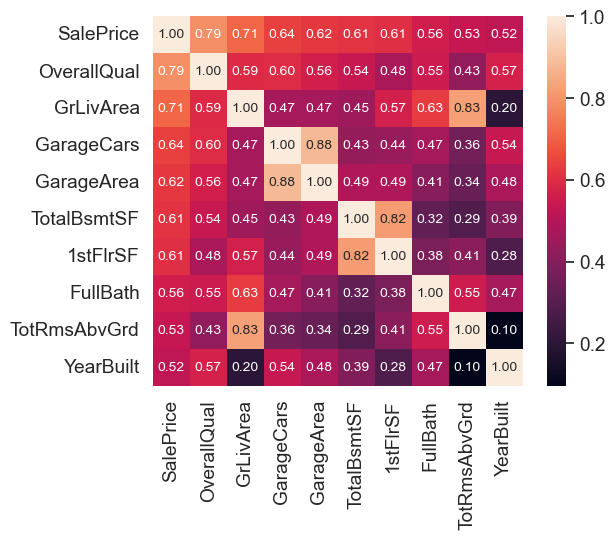

In [31]:
k = 10 #number of variables for heatmap
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables
Total rooms above ground(’TotroomAbvGr’) and number of Bedrooms above
ground (’BedroomAbvGr’) have a high correlation of 0.7.
House Price is highly correlated with area of the property, total number of bedrooms and area of the living space and overall quality.

Multicollinearity Present in the dataset
We should remove that.

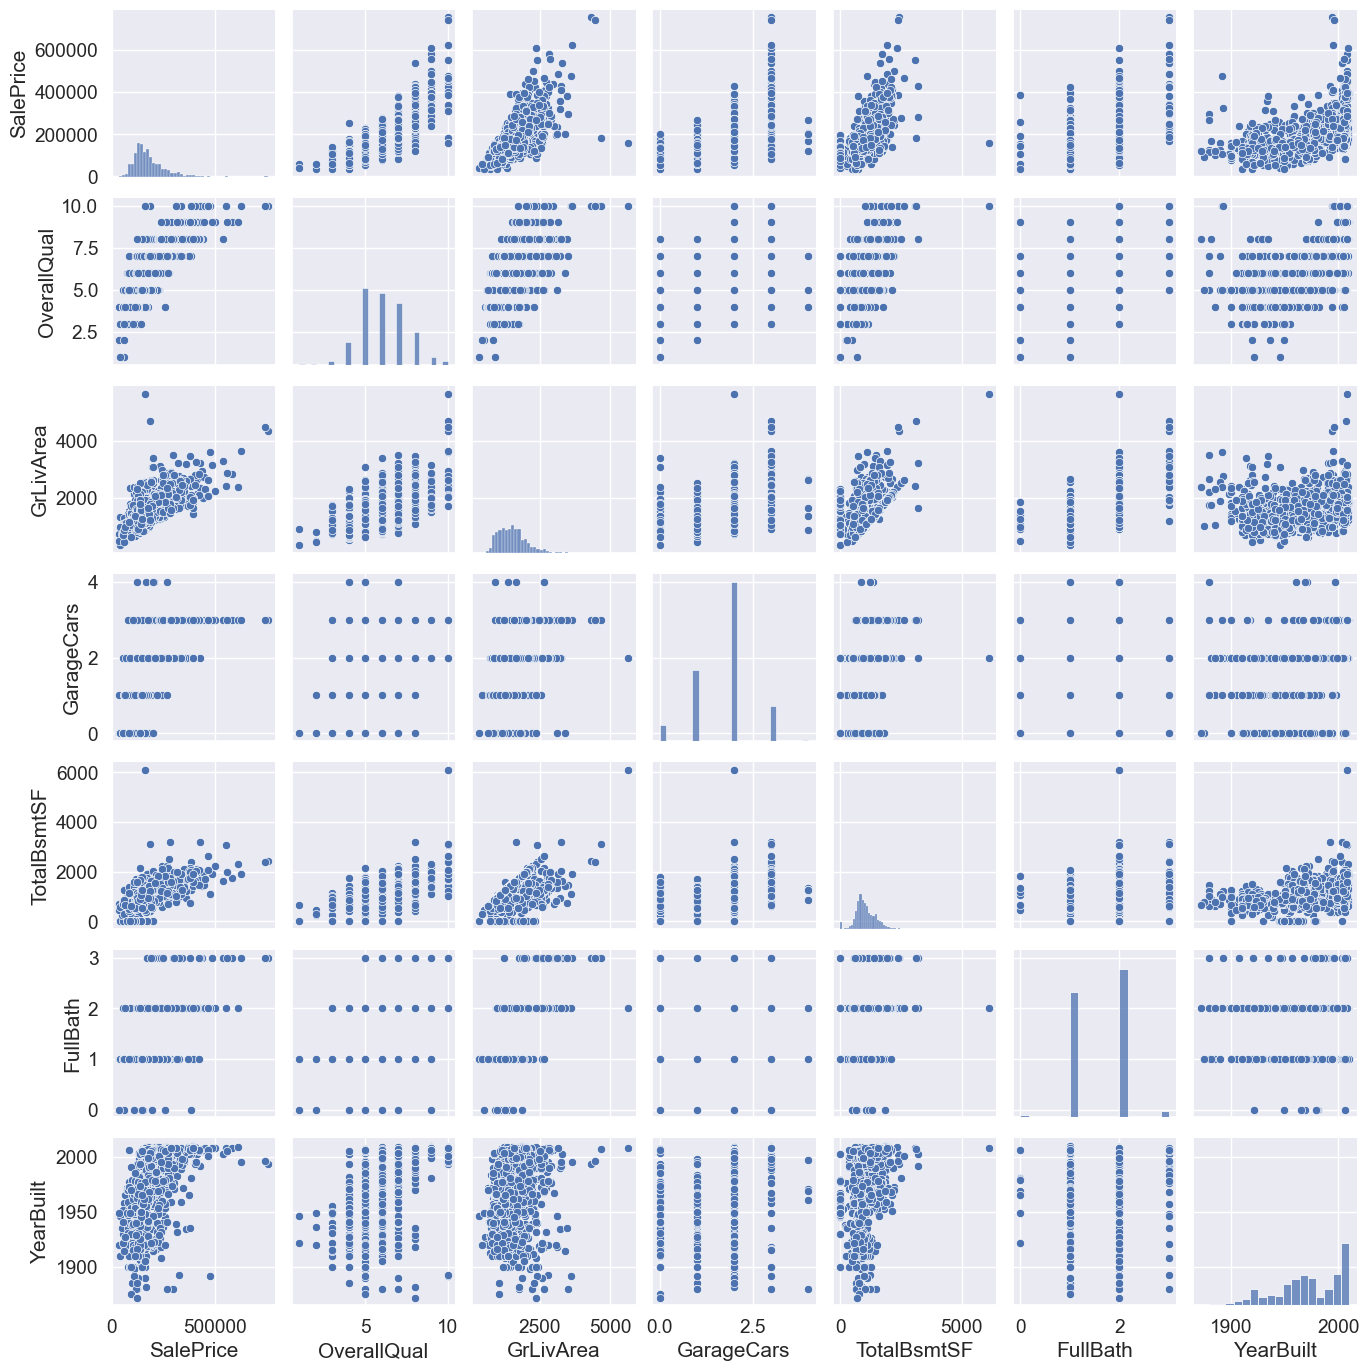

In [32]:
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data=df_train[selected_features], size=2)

In [33]:
df_dummy=pd.get_dummies(df)
df_dummy


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OverallQual _9,OverallCond _1,OverallCond _2,OverallCond _3,OverallCond _4,OverallCond _5,OverallCond _6,OverallCond _7,OverallCond _8,OverallCond _9
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,0,1,0,0,0,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,0,1,0,0,0,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,0,1,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,0,0,0,0,1,0,0
2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,0,0,1,0,0,0,0
2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
#Removing The Skewness-
#Log Transformation of the target variable-

target=df_train['SalePrice']
target_log=np.log(target)

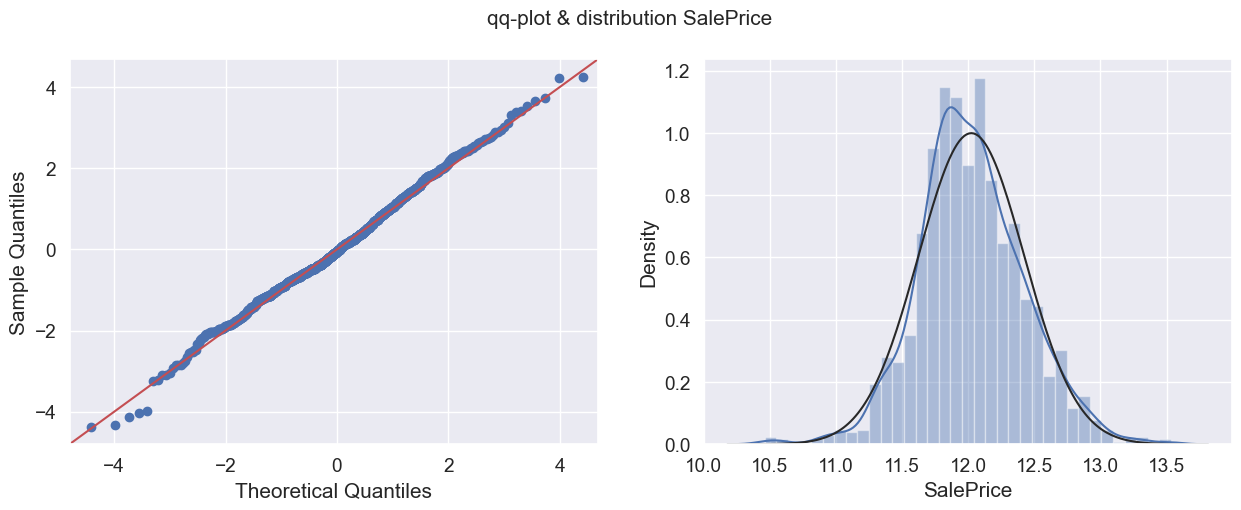

In [35]:
#plotting the log transformed data--

fig,ax= plt.subplots(1,2,figsize= (15, 5))
fig.suptitle("qq-plot & distribution SalePrice ",fontsize=15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax=ax[0])
sns.distplot(target_log, kde=True, hist=True, fit=norm, ax=ax[1])
plt.show()

In [36]:
y=target_log
X=df_dummy

In [37]:
#Train-Test Split--

X_tr=df_dummy.iloc[:1460,:]
y_tr=target_log.iloc[:1460]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_tr,y_tr,test_size=0.25,random_state=42)

In [38]:
#Multiple Linear Regression-
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
Cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
print(Cdf)



3.504082532795742
                   Coeff
LotFrontage     0.000378
LotArea         0.000002
OverallQual     0.071754
OverallCond     0.009332
YearBuilt       0.001873
...                  ...
OverallCond _5 -0.036560
OverallCond _6  0.006189
OverallCond _7  0.017514
OverallCond _8  0.010883
OverallCond _9  0.048185

[450 rows x 1 columns]


In [39]:
#import statsmodels.api as sm
#lr= LinearRegression()
#model = sm.OLS(y_train,X_train)
#fitted_model = model.fit()
#fitted_model.summary()

In [40]:
pred=lm.predict(X_test)

In [41]:
x=range(1,366)
data=pd.DataFrame(pred,y_test)

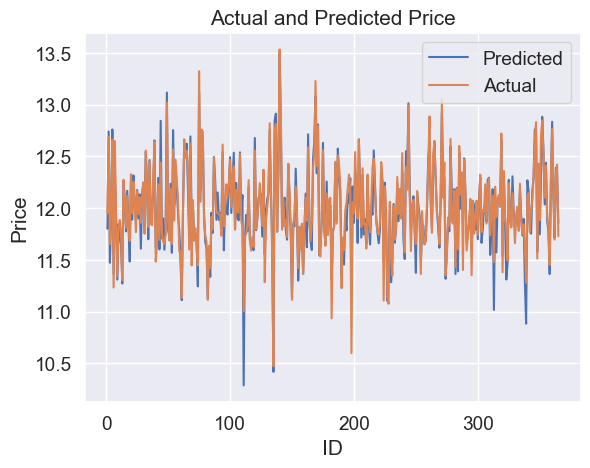

In [42]:
#Plot Predicted and Actual Price on same graph
plt.plot(x,pred)
plt.plot(x,y_test)
plt.xlabel('ID')
plt.ylabel('Price')
plt.title("Actual and Predicted Price")
plt.legend(['Predicted','Actual'],loc='upper right')
plt.show()

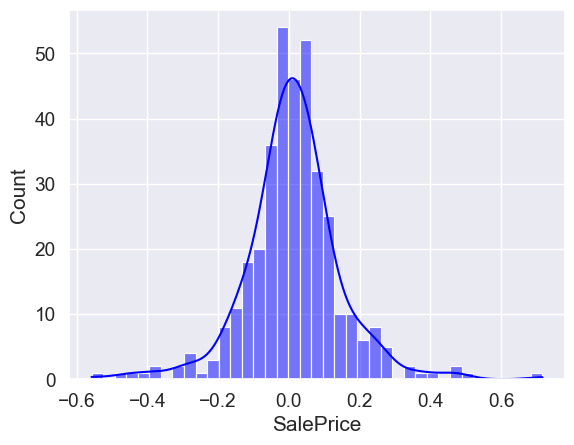

In [43]:
#Residual plot (checking if normally distributed)
sns.histplot(y_test-pred,kde=True,color='blue') #add xlabel and ylabel

sm.qqplot(y_test-pred, stats.t, distargs=(4,),fit=True, line="45", ax=ax[0])
sns.distplot(y_test-pred, kde=True, hist=True, fit=norm, ax=ax[1])
plt.show()

In [44]:
from sklearn.metrics import r2_score 
R1_square=r2_score(y_train,lm.predict(X_train))
R2_square=r2_score(y_test,pred) 
print('Coefficient of Determination of Training Data:', R1_square) 
print('Coefficient of Determination of Test Data:', R2_square) 

Coefficient of Determination of Training Data: 0.9555237324537008
Coefficient of Determination of Test Data: 0.8912569892016695


In [45]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.09472604092200623
MSE: 0.01882987540715297
RMSE: 0.13722199316127487


In [46]:
#RIDGE REGULARIZATION
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)            
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-0.09247951384877748


In [48]:
#final ridge model
alpha=50
ridge=Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.intercept_)
Cdf_R=pd.DataFrame(ridge.coef_,X.columns,columns=['Coeff'])
print(Cdf_R)

4.940917694945928
                   Coeff
LotFrontage    -0.000703
LotArea         0.000002
OverallQual     0.060501
OverallCond     0.034576
YearBuilt       0.001889
...                  ...
OverallCond _5 -0.001495
OverallCond _6  0.012628
OverallCond _7  0.011067
OverallCond _8 -0.008576
OverallCond _9  0.000749

[450 rows x 1 columns]


In [49]:
pred_ridge=ridge.predict(X_test)
RR1_square=r2_score(y_train,ridge.predict(X_train))
RR2_square=r2_score(y_test,pred_ridge) 
print('Coefficient of Determination of Training Data:',RR1_square) 
print('Coefficient of Determination of Test Data:',RR2_square) 

Coefficient of Determination of Training Data: 0.9129093006104155
Coefficient of Determination of Test Data: 0.8988686829125436


In [50]:
print("MAE:",metrics.mean_absolute_error(y_test,pred_ridge))
print("MSE:",metrics.mean_squared_error(y_test,pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_ridge)))

MAE: 0.09236103172792855
MSE: 0.01751183902797843
RMSE: 0.13233230530742834


In [51]:
#The Lasso-
from sklearn.linear_model import Lasso
params = {'alpha': [0.00005,0.0001,0.001,0.008,0.01,0.1]}
lasso = Lasso()
# cross validation
model_cv_l = GridSearchCV(estimator = lasso,param_grid = params,scoring= 'neg_mean_absolute_error',cv = folds,return_train_score=True,verbose = 1)            
model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.09168138038886539


In [53]:
#final lasso model--
alpha = 0.001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train) 
print(lasso.intercept_)
Cdf_L=pd.DataFrame(lasso.coef_,X.columns,columns=['Coeff'])
print(Cdf_L)

4.9678453465066115
                   Coeff
LotFrontage    -0.000554
LotArea         0.000002
OverallQual     0.057523
OverallCond     0.036163
YearBuilt       0.001976
...                  ...
OverallCond _5 -0.000000
OverallCond _6  0.008305
OverallCond _7  0.008067
OverallCond _8 -0.000000
OverallCond _9 -0.000000

[450 rows x 1 columns]


In [54]:
removed_feats=X_train.columns[(lasso.coef_ == 0).ravel().tolist()]
removed_feats

Index(['BsmtHalfBath', 'MSSubClass_120', 'MSSubClass_150', 'MSSubClass_180',
       'MSSubClass_190', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_75', 'MSSubClass_80',
       ...
       'OverallQual _2', 'OverallQual _3', 'OverallQual _4', 'OverallQual _6',
       'OverallCond _1', 'OverallCond _2', 'OverallCond _4', 'OverallCond _5',
       'OverallCond _8', 'OverallCond _9'],
      dtype='object', length=345)

In [55]:
pred_lasso=lasso.predict(X_test)
RL1_square=r2_score(y_train,lasso.predict(X_train))
RL2_square=r2_score(y_test,pred_lasso) 
print('Coefficient of Determination of Training Data:',RL1_square) 
print('Coefficient of Determination of Test Data:',RL2_square) 

Coefficient of Determination of Training Data: 0.9130332840768101
Coefficient of Determination of Test Data: 0.9018872005968276


In [56]:
print("MAE:",metrics.mean_absolute_error(y_test,pred_lasso))
print("MSE:",metrics.mean_squared_error(y_test,pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_lasso)))

MAE: 0.08974379218399045
MSE: 0.016989154291809364
RMSE: 0.1303424500759801


In [57]:
numerics = ['float64', 'int64']
df_n=df.select_dtypes(include=numerics)
df_n.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,total_area
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,2.0,548.0,0,61,0,0,0,0,0,2566.0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,2.0,460.0,298,0,0,0,0,0,0,2524.0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,2.0,608.0,0,42,0,0,0,0,0,2706.0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,3.0,642.0,0,35,272,0,0,0,0,2473.0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,3.0,836.0,192,84,0,0,0,0,0,3343.0


In [58]:
#DECISION TREE REGRESSION
#Hyper parameter tuning-
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

tr_regressor=DecisionTreeRegressor()
tr_regressor.fit(X_train,y_train)
pred_tr=tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)
#r2_tr=r2_score(y_test,pred_tr)

In [59]:
print("Accuracy:",decision_score)
print("Explained Variance:",expl_tr)


Accuracy: 0.7602430967860564
Explained Variance: 0.7599550965249238


In [60]:
print("MAE:",metrics.mean_absolute_error(y_test,pred_tr))
print("MSE:",metrics.mean_squared_error(y_test,pred_tr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_tr)))

MAE: 0.14224146358417547
MSE: 0.04151616349758731
RMSE: 0.20375515575706868


If the dataset contains features some of which are Categorical Variables and some of the oters are Continuous Variables, Decision
Tree will be better than Linear Regression.
Decision Tree supports Non linearity while Linear Regression supports only Linear Solution.
When there are large number of features with less datasets(with low noise),Linear Regression may outperform Decision Tree.


In [61]:
#conda install pydotplus

In [62]:
#Visualization-
#from six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()
#export_graphviz(tr_regressor, out_file=dot_data,filled=True, rounded=True,special_characters=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [63]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
#Hyper parameter tuning-

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [64]:
print("Accuracy:",rf_score)
print("Explained Variance:",expl_rf)

Accuracy: 0.8873236300027935
Explained Variance: 0.8584775410188558


In [65]:
print("MAE:",metrics.mean_absolute_error(y_test,rf_pred))
print("MSE:",metrics.mean_squared_error(y_test,rf_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

MAE: 0.09427823999347354
MSE: 0.019510973558681723
RMSE: 0.13968168655440028


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor=GradientBoostingRegressor()
gb_regressor.fit(X_train,y_train)
gb_pred=gb_regressor.predict(X_test)
gb_score=gb_regressor.score(X_test,y_test)
expl_gb=explained_variance_score(gb_pred,y_test)

In [67]:
print("Accuracy:",gb_score)
print("Explained Variance:",expl_gb)

Accuracy: 0.8927923810764835
Explained Variance: 0.8708458593591768


In [68]:
print("MAE:",metrics.mean_absolute_error(y_test,gb_pred))
print("MSE:",metrics.mean_squared_error(y_test,gb_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,gb_pred)))

MAE: 0.0927757888008213
MSE: 0.01856400785859374
RMSE: 0.1362497994809304


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(X_tr)

In [70]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42,n_components=10)
pca.fit(df_n.iloc[:1460,:])

PCA(n_components=10, random_state=42)

In [71]:
pca.explained_variance_

array([9.97219409e+07, 8.90454088e+05, 2.97958340e+05, 2.45579350e+05,
       9.05273970e+04, 3.33081651e+04, 3.09022824e+04, 2.29911735e+04,
       1.40463374e+04, 4.18518579e+03])

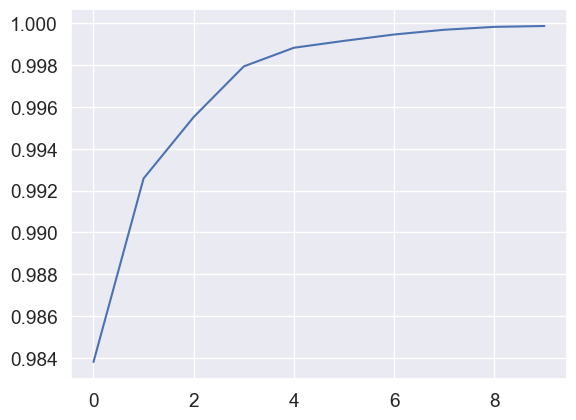

In [72]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
#Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [73]:
cumulative_explained_variance[8]

0.9998349705628085

In [74]:
pca = PCA(n_components=8)
# Fit and transform item_data_scaled
PC_items = pca.fit_transform(df_n.iloc[:1460,:])
# Display shape of PC_items
PC_items.shape

(1460, 8)

In [75]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)
# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]
# Update its index
items_pca.index =df_n.iloc[:1460,:].index
# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Id,,,,,,,,
1,-2060.411440,138.824959,483.704841,-57.356208,-214.193772,136.380751,-37.611915,15.007846
2,-915.733183,-99.330543,594.372755,-76.490387,257.206163,-67.175913,-39.466607,-93.651403
3,740.830128,226.562446,109.617380,-43.736917,-186.853289,146.398371,-9.419499,-34.686322
4,-968.133612,15.645226,-154.368210,-28.838422,-261.817715,123.753139,17.081420,-184.936865
5,3774.721641,950.387425,186.589666,-42.957726,-216.496740,311.035103,76.386399,7.004600


In [76]:
len_train=X_train.shape[0]
pca_xtrain = items_pca[:len_train]
pca_xtest = items_pca[len_train:]

In [77]:
# Dataframe dimensions
print(pca_xtrain.shape)
print(pca_xtest.shape)

(1095, 8)
(365, 8)


In [78]:
X_p= pca_xtrain.copy()
y_p=y_tr[:len_train]
Xp_test = pca_xtest.copy()
#y_test = df_train[target]
X_p.info()
Xp_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1 to 1095
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     1095 non-null   float64
 1   PC2     1095 non-null   float64
 2   PC3     1095 non-null   float64
 3   PC4     1095 non-null   float64
 4   PC5     1095 non-null   float64
 5   PC6     1095 non-null   float64
 6   PC7     1095 non-null   float64
 7   PC8     1095 non-null   float64
dtypes: float64(8)
memory usage: 77.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1096 to 1460
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     365 non-null    float64
 1   PC2     365 non-null    float64
 2   PC3     365 non-null    float64
 3   PC4     365 non-null    float64
 4   PC5     365 non-null    float64
 5   PC6     365 non-null    float64
 6   PC7     365 non-null    float64
 7   PC8     365 non-null    float64
dtype

In [79]:
X_train_new= (X_p - X_p.mean()) / X_p.std()
# Summary statistics of X_train_new
X_train_new.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03,1095.000000,1.095000e+03
mean,-3.244487e-18,1.622244e-18,8.111218e-19,-9.733462e-18,7.300097e-18,-1.622244e-17,0.000000,-2.595590e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-8.466182e-01,-4.939904e+00,-2.696233e+00,-9.519857e-01,-3.905388e+00,-4.132915e+00,-3.402979,-2.907090e+00
25%,-2.797763e-01,-6.912746e-01,-8.246111e-01,-1.272547e-01,-6.798689e-01,-5.550481e-01,-0.503993,-6.312215e-01
50%,-1.035924e-01,-9.718285e-02,1.243454e-01,-8.409511e-02,1.015692e-02,1.575029e-02,-0.160454,-1.010948e-01
75%,9.488511e-02,5.682187e-01,7.829042e-01,-2.733795e-02,8.273953e-01,6.124065e-01,0.237566,4.852206e-01
max,1.861003e+01,5.928957e+00,2.907911e+00,3.071693e+01,3.931646e+00,4.335191e+00,6.876865,7.834378e+00


In [80]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler
make_pipeline(StandardScaler(), Lasso(random_state=42))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

In [81]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=42)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=42)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=42))
}

In [82]:
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [83]:
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}
# GradientBoosting hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}


In [84]:
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters
}

In [85]:
for key in ['gb','ridge','rf','lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [86]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model=GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

# Fit and tune model
model.fit(X_train_new,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=42))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,
                                          5, 10]})

In [87]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
rf has been fitted.
gb has been fitted.


In [88]:
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [89]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
rf has been fitted.
gb has been fitted.


In [90]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.8348330623279713
ridge 0.7635959693266079
rf 0.8725681347443599
gb 0.8855244084042097


In [91]:
fitted_models['gb']

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__learning_rate': [0.05, 0.1,
                                                                      0.2],
                         'gradientboostingregressor__max_depth': [1, 3, 5],
                         'gradientboostingregressor__n_estimators': [100, 200]})

In [92]:
prediction= fitted_models['gb'].predict(X_test)

In [93]:
pred_train=fitted_models['gb'].predict(X_train)
print('R2:',r2_score(y_train,pred_train ))

R2: 0.9773943509293598


In [94]:
print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("MSE:",metrics.mean_squared_error(y_test,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 0.09066079941840008
MSE: 0.01772806849124655
RMSE: 0.13314679301900798
